https://www.datacamp.com/community/tutorials/k-means-clustering-python#intro

In [2]:
import numpy as np
import pandas as pd

from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder,OneHotEncoder, MinMaxScaler 
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.pipeline import Pipeline

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Load the train and test datasets to create two DataFrames
#train_url = "http://s3.amazonaws.com/assets.datacamp.com/course/Kaggle/train.csv"

train = pd.read_csv('train.csv')
test = pd.read_csv("test.csv")

In [4]:
print("***** Train_Set *****")
#print(train.columns)
print(train.columns.values)
#print(train.head())
print("\n")
print("***** Test_Set *****")
#print(test.head())

***** Train_Set *****
['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


***** Test_Set *****


In [5]:
print("***** Train_Set *****")
print(train.describe())
print("\n")
print("***** Test_Set *****")
#print(test.describe())

***** Train_Set *****
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


***** Test_Set *****


In [6]:
# For the train set
train.isna().head()
# For the test set
#test.isna().head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False


In [7]:
print("*****In the train set*****")
print(train.isna().sum())
print("\n")
print("*****In the test set*****")
#print(test.isna().sum())

*****In the train set*****
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


*****In the test set*****


In [8]:
print(train.isna().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [9]:
# Fill missing values with mean column values in the train set
#print(train['Age'])
print(train.mean())
print('-----------------------')
train.fillna(train.mean(), inplace=True)
print('-----------------------')
print(train.isna().sum())

PassengerId    446.000000
Survived         0.383838
Pclass           2.308642
Age             29.699118
SibSp            0.523008
Parch            0.381594
Fare            32.204208
dtype: float64
-----------------------
-----------------------
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [10]:
# Fill missing values with mean column values in the test set
test.fillna(test.mean(), inplace=True)

In [11]:
train['Ticket'].head()

0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
Name: Ticket, dtype: object

In [12]:
train['Cabin'].head()

0     NaN
1     C85
2     NaN
3    C123
4     NaN
Name: Cabin, dtype: object

In [13]:
print(train[['Pclass', 'Survived']].groupby(['Pclass'],as_index=False).sum())
print(train[['Pclass', 'Survived']].sum())

   Pclass  Survived
0       1       136
1       2        87
2       3       119
Pclass      2057
Survived     342
dtype: int64


In [14]:
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [15]:
train[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [16]:
train[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


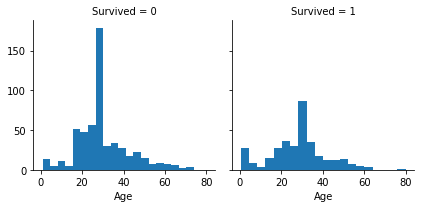

In [17]:
g = sns.FacetGrid(train, col='Survived')
g.map(plt.hist, 'Age', bins=20)

In [18]:
# Let's investigate if you have non-numeric data left
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [19]:
#print(train['Embarked'])
train = train.drop(['Name','Ticket', 'Cabin','Embarked'], axis=1)
test = test.drop(['Name','Ticket', 'Cabin','Embarked'], axis=1)

In [20]:
print(train.columns)
#print(train['Sex'])
labelEncoder = LabelEncoder()
labelEncoder.fit(train['Sex'])
labelEncoder.fit(test['Sex'])
train['Sex'] = labelEncoder.transform(train['Sex'])
test['Sex'] = labelEncoder.transform(test['Sex'])
#print(train['Sex'])

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare'],
      dtype='object')


In [21]:
# Let's investigate if you have non-numeric data left
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null int64
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
dtypes: float64(2), int64(6)
memory usage: 55.8 KB


# Brilliant!
Looks like you are good to go to train your K-Means model now.

You can first drop the Survival column from the data with the drop() function.

In [22]:
X = np.array(train.drop(['Survived'], 1).astype(float))
print(X)

[[  1.       3.       1.     ...   1.       0.       7.25  ]
 [  2.       1.       0.     ...   1.       0.      71.2833]
 [  3.       3.       0.     ...   0.       0.       7.925 ]
 ...
 [889.       3.       0.     ...   1.       2.      23.45  ]
 [890.       1.       1.     ...   0.       0.      30.    ]
 [891.       3.       1.     ...   0.       0.       7.75  ]]


In [23]:
y = np.array(train['Survived'])
print(y)

[0 1 1 1 0 0 0 0 1 1 1 1 0 0 0 1 0 1 0 1 0 1 1 1 0 1 0 0 1 0 0 1 1 0 0 0 1
 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0
 1 0 0 0 1 1 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0
 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1
 0 1 1 0 0 1 0 1 1 1 1 0 0 1 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0
 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1
 1 0 1 0 0 0 0 0 1 1 1 0 1 1 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 1 1 1 1 0 0 0 0
 0 0 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 0 0 1 1 0 1 1 0 0 1 1 0 1 0 1 1 1 1 0 0
 0 1 0 0 1 1 0 1 1 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 1 1 1
 1 0 0 0 0 1 1 0 0 0 1 1 0 1 0 0 0 1 0 1 1 1 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0
 1 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 0 0 1 0 1 0 0 1 0 0 1
 1 1 1 1 1 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0
 0 0 1 1 0 1 0 0 1 0 0 0 

In [24]:
kmeans = KMeans(n_clusters=2) # You want cluster the passenger records into 2: Survived or Not survived
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [26]:
correct = 0
for i in range(len(X)):
    predict_me = np.array(X[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = kmeans.predict(predict_me)
    if prediction[0] == y[i]:
        correct += 1

print(correct/len(X))

0.49158249158249157


In [1]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
#print(X_scaled)

NameError: name 'MinMaxScaler' is not defined

In [28]:
kmeans.fit(X_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [29]:
correct = 0
for i in range(len(X)):
    predict_me = np.array(X[i].astype(float))
    #print(predict_me)
    predict_me = predict_me.reshape(-1, len(predict_me))
    #print(predict_me)
    prediction = kmeans.predict(predict_me)
    #print(prediction)
    #print(prediction[0])
    #print(y[i])
    if prediction[0] == y[i]:
        correct += 1

print(correct/len(X))

[ 1.    3.    1.   22.    1.    0.    7.25]
[[ 1.    3.    1.   22.    1.    0.    7.25]]
[0]
0
0
[ 2.      1.      0.     38.      1.      0.     71.2833]
[[ 2.      1.      0.     38.      1.      0.     71.2833]]
[1]
1
1
[ 3.     3.     0.    26.     0.     0.     7.925]
[[ 3.     3.     0.    26.     0.     0.     7.925]]
[0]
0
1
[ 4.   1.   0.  35.   1.   0.  53.1]
[[ 4.   1.   0.  35.   1.   0.  53.1]]
[1]
1
1
[ 5.    3.    1.   35.    0.    0.    8.05]
[[ 5.    3.    1.   35.    0.    0.    8.05]]
[0]
0
0
[ 6.          3.          1.         29.69911765  0.          0.
  8.4583    ]
[[ 6.          3.          1.         29.69911765  0.          0.
   8.4583    ]]
[0]
0
0
[ 7.      1.      1.     54.      0.      0.     51.8625]
[[ 7.      1.      1.     54.      0.      0.     51.8625]]
[0]
0
0
[ 8.     3.     1.     2.     3.     1.    21.075]
[[ 8.     3.     1.     2.     3.     1.    21.075]]
[0]
0
0
[ 9.      3.      0.     27.      0.      2.     11.1333]
[[ 9.      3.    

[0]
0
1
[127.           3.           1.          29.69911765   0.
   0.           7.75      ]
[[127.           3.           1.          29.69911765   0.
    0.           7.75      ]]
[0]
0
0
[128.       3.       1.      24.       0.       0.       7.1417]
[[128.       3.       1.      24.       0.       0.       7.1417]]
[0]
0
1
[129.           3.           0.          29.69911765   1.
   1.          22.3583    ]
[[129.           3.           0.          29.69911765   1.
    1.          22.3583    ]]
[0]
0
1
[130.      3.      1.     45.      0.      0.      6.975]
[[130.      3.      1.     45.      0.      0.      6.975]]
[0]
0
0
[131.       3.       1.      33.       0.       0.       7.8958]
[[131.       3.       1.      33.       0.       0.       7.8958]]
[0]
0
0
[132.     3.     1.    20.     0.     0.     7.05]
[[132.     3.     1.    20.     0.     0.     7.05]]
[0]
0
0
[133.    3.    0.   47.    1.    0.   14.5]
[[133.    3.    0.   47.    1.    0.   14.5]]
[0]
0
0
[134.   2.

[256.       3.       0.      29.       0.       2.      15.2458]
[[256.       3.       0.      29.       0.       2.      15.2458]]
[0]
0
1
[257.           1.           0.          29.69911765   0.
   0.          79.2       ]
[[257.           1.           0.          29.69911765   0.
    0.          79.2       ]]
[0]
0
1
[258.    1.    0.   30.    0.    0.   86.5]
[[258.    1.    0.   30.    0.    0.   86.5]]
[0]
0
1
[259.       1.       0.      35.       0.       0.     512.3292]
[[259.       1.       0.      35.       0.       0.     512.3292]]
[1]
1
1
[260.   2.   0.  50.   0.   1.  26.]
[[260.   2.   0.  50.   0.   1.  26.]]
[0]
0
1
[261.           3.           1.          29.69911765   0.
   0.           7.75      ]
[[261.           3.           1.          29.69911765   0.
    0.           7.75      ]]
[0]
0
0
[262.       3.       1.       3.       4.       2.      31.3875]
[[262.       3.       1.       3.       4.       2.      31.3875]]
[0]
0
1
[263.     1.     1.    52.     1

0
[359.           3.           0.          29.69911765   0.
   0.           7.8792    ]
[[359.           3.           0.          29.69911765   0.
    0.           7.8792    ]]
[0]
0
1
[360.           3.           0.          29.69911765   0.
   0.           7.8792    ]
[[360.           3.           0.          29.69911765   0.
    0.           7.8792    ]]
[0]
0
1
[361.    3.    1.   40.    1.    4.   27.9]
[[361.    3.    1.   40.    1.    4.   27.9]]
[0]
0
0
[362.       2.       1.      29.       1.       0.      27.7208]
[[362.       2.       1.      29.       1.       0.      27.7208]]
[0]
0
0
[363.       3.       0.      45.       0.       1.      14.4542]
[[363.       3.       0.      45.       0.       1.      14.4542]]
[0]
0
0
[364.     3.     1.    35.     0.     0.     7.05]
[[364.     3.     1.    35.     0.     0.     7.05]]
[0]
0
0
[365.           3.           1.          29.69911765   1.
   0.          15.5       ]
[[365.           3.           1.          29.69911765   

[0]
0
1
[462.     3.     1.    34.     0.     0.     8.05]
[[462.     3.     1.    34.     0.     0.     8.05]]
[0]
0
0
[463.    1.    1.   47.    0.    0.   38.5]
[[463.    1.    1.   47.    0.    0.   38.5]]
[0]
0
0
[464.   2.   1.  48.   0.   0.  13.]
[[464.   2.   1.  48.   0.   0.  13.]]
[0]
0
0
[465.           3.           1.          29.69911765   0.
   0.           8.05      ]
[[465.           3.           1.          29.69911765   0.
    0.           8.05      ]]
[0]
0
0
[466.     3.     1.    38.     0.     0.     7.05]
[[466.     3.     1.    38.     0.     0.     7.05]]
[0]
0
0
[467.           2.           1.          29.69911765   0.
   0.           0.        ]
[[467.           2.           1.          29.69911765   0.
    0.           0.        ]]
[0]
0
0
[468.     1.     1.    56.     0.     0.    26.55]
[[468.     1.     1.    56.     0.     0.    26.55]]
[0]
0
0
[469.           3.           1.          29.69911765   0.
   0.           7.725     ]
[[469.           3.   

0
1
[556.     1.     1.    62.     0.     0.    26.55]
[[556.     1.     1.    62.     0.     0.    26.55]]
[0]
0
0
[557.    1.    0.   48.    1.    0.   39.6]
[[557.    1.    0.   48.    1.    0.   39.6]]
[0]
0
1
[558.           1.           1.          29.69911765   0.
   0.         227.525     ]
[[558.           1.           1.          29.69911765   0.
    0.         227.525     ]]
[0]
0
0
[559.     1.     0.    39.     1.     1.    79.65]
[[559.     1.     0.    39.     1.     1.    79.65]]
[0]
0
1
[560.    3.    0.   36.    1.    0.   17.4]
[[560.    3.    0.   36.    1.    0.   17.4]]
[0]
0
1
[561.           3.           1.          29.69911765   0.
   0.           7.75      ]
[[561.           3.           1.          29.69911765   0.
    0.           7.75      ]]
[0]
0
0
[562.       3.       1.      40.       0.       0.       7.8958]
[[562.       3.       1.      40.       0.       0.       7.8958]]
[0]
0
0
[563.    2.    1.   28.    0.    0.   13.5]
[[563.    2.    1.   28.  

0
0
[656.    2.    1.   24.    2.    0.   73.5]
[[656.    2.    1.   24.    2.    0.   73.5]]
[0]
0
0
[657.           3.           1.          29.69911765   0.
   0.           7.8958    ]
[[657.           3.           1.          29.69911765   0.
    0.           7.8958    ]]
[0]
0
0
[658.    3.    0.   32.    1.    1.   15.5]
[[658.    3.    0.   32.    1.    1.   15.5]]
[0]
0
0
[659.   2.   1.  23.   0.   0.  13.]
[[659.   2.   1.  23.   0.   0.  13.]]
[0]
0
0
[660.      1.      1.     58.      0.      2.    113.275]
[[660.      1.      1.     58.      0.      2.    113.275]]
[0]
0
0
[661.     1.     1.    50.     2.     0.   133.65]
[[661.     1.     1.    50.     2.     0.   133.65]]
[0]
0
1
[662.      3.      1.     40.      0.      0.      7.225]
[[662.      3.      1.     40.      0.      0.      7.225]]
[0]
0
0
[663.       1.       1.      47.       0.       0.      25.5875]
[[663.       1.       1.      47.       0.       0.      25.5875]]
[0]
0
0
[664.       3.       1.      

[0]
0
1
[7.56e+02 2.00e+00 1.00e+00 6.70e-01 1.00e+00 1.00e+00 1.45e+01]
[[7.56e+02 2.00e+00 1.00e+00 6.70e-01 1.00e+00 1.00e+00 1.45e+01]]
[0]
0
1
[757.       3.       1.      28.       0.       0.       7.7958]
[[757.       3.       1.      28.       0.       0.       7.7958]]
[0]
0
0
[758.    2.    1.   18.    0.    0.   11.5]
[[758.    2.    1.   18.    0.    0.   11.5]]
[0]
0
0
[759.     3.     1.    34.     0.     0.     8.05]
[[759.     3.     1.    34.     0.     0.     8.05]]
[0]
0
0
[760.    1.    0.   33.    0.    0.   86.5]
[[760.    1.    0.   33.    0.    0.   86.5]]
[0]
0
1
[761.           3.           1.          29.69911765   0.
   0.          14.5       ]
[[761.           3.           1.          29.69911765   0.
    0.          14.5       ]]
[0]
0
0
[762.      3.      1.     41.      0.      0.      7.125]
[[762.      3.      1.     41.      0.      0.      7.125]]
[0]
0
0
[763.       3.       1.      20.       0.       0.       7.2292]
[[763.       3.       1.      

[857.       1.       0.      45.       1.       1.     164.8667]
[[857.       1.       0.      45.       1.       1.     164.8667]]
[0]
0
1
[858.     1.     1.    51.     0.     0.    26.55]
[[858.     1.     1.    51.     0.     0.    26.55]]
[0]
0
1
[859.       3.       0.      24.       0.       3.      19.2583]
[[859.       3.       0.      24.       0.       3.      19.2583]]
[0]
0
1
[860.           3.           1.          29.69911765   0.
   0.           7.2292    ]
[[860.           3.           1.          29.69911765   0.
    0.           7.2292    ]]
[0]
0
0
[861.       3.       1.      41.       2.       0.      14.1083]
[[861.       3.       1.      41.       2.       0.      14.1083]]
[0]
0
0
[862.    2.    1.   21.    1.    0.   11.5]
[[862.    2.    1.   21.    1.    0.   11.5]]
[0]
0
0
[863.       1.       0.      48.       0.       0.      25.9292]
[[863.       1.       0.      48.       0.       0.      25.9292]]
[0]
0
1
[864.           3.           0.          29.699